2017 Instacart Data

Instacart is a grocery delivery platform where customers can place a grocery order and have it delivered to them. In 2017 a
work dataset was released by Instacartfor a Kaggie competition. I will need to clean up the data and give report that provides
insight on shopping habits from Instacart customers.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
instacart_orders=pd.read_csv('/datasets/instacart_orders.csv', sep=";")
instacart_orders.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


In [3]:
instacart_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [4]:
instacart_orders.describe()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,4.789670e+05,478967.000000,478967.000000,478967.000000,478967.000000,450148.000000
mean,1.709947e+06,102966.537475,17.157808,2.775058,13.446676,11.101751
std,9.869480e+05,59525.328991,17.704688,2.045869,4.224986,9.189975
min,4.000000e+00,2.000000,1.000000,0.000000,0.000000,0.000000
25%,8.564685e+05,51414.000000,5.000000,1.000000,10.000000,4.000000
50%,1.709522e+06,102633.000000,11.000000,3.000000,13.000000,7.000000
75%,2.562990e+06,154419.000000,23.000000,5.000000,16.000000,15.000000
max,3.421079e+06,206209.000000,100.000000,6.000000,23.000000,30.000000


In [5]:
df_products=pd.read_csv('/datasets/products.csv',sep=";")
df_products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [6]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [7]:
df_products.describe()

,product_id,aisle_id,department_id
count,49694.000000,49694.000000,49694.000000
mean,24847.500000,67.773192,11.728478
std,14345.566475,38.317265,5.850314
min,1.000000,1.000000,1.000000
25%,12424.250000,35.000000,7.000000
50%,24847.500000,69.000000,13.000000
75%,37270.750000,100.000000,17.000000
max,49694.000000,134.000000,21.000000


In [8]:
insta_aisles=pd.read_csv('/datasets/aisles.csv', sep=";")
insta_aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [9]:
insta_aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [10]:
insta_aisles.describe()

,aisle_id
count,134.000000
mean,67.500000
std,38.826537
min,1.000000
25%,34.250000
50%,67.500000
75%,100.750000
max,134.000000


In [11]:
df_department=pd.read_csv('/datasets/departments.csv', sep=";")
df_department.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [12]:
df_department.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [13]:
df_department.describe()

,department_id
count,21.000000
mean,11.000000
std,6.204837
min,1.000000
25%,6.000000
50%,11.000000
75%,16.000000
max,21.000000


In [14]:
order_products=pd.read_csv('/datasets/order_products.csv', sep=";")
order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


In [15]:
order_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


In [16]:
order_products.describe()

,order_id,product_id,add_to_cart_order,reordered
count,4.545007e+06,4.545007e+06,4.544171e+06,4.545007e+06
mean,1.711166e+06,2.558084e+04,8.351669e+00,5.905025e-01
std,9.850955e+05,1.409552e+04,7.080368e+00,4.917411e-01
min,4.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,8.608170e+05,1.353500e+04,3.000000e+00,0.000000e+00
50%,1.711530e+06,2.527200e+04,6.000000e+00,1.000000e+00
75%,2.561311e+06,3.793500e+04,1.100000e+01,1.000000e+00
max,3.421079e+06,4.969400e+04,6.400000e+01,1.000000e+00


## Find and remove duplicate values (and describe why you make your choices)

### `orders` data frame

In [17]:
# Check for duplicated orders
instacart_orders.duplicated().sum()

15

In [18]:
# Check for all orders placed Wednesday at 2:00 AM
wednesday_at_2am_orders = instacart_orders[(instacart_orders['order_dow'] == 2) & (instacart_orders['order_hour_of_day'] == 2)]
wednesday_at_2am_orders

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
1295,1474941,115569,5,2,2,28.0
2391,1640269,173965,15,2,2,2.0
2550,1223696,55276,11,2,2,30.0
5965,579194,85018,14,2,2,11.0
17680,2004230,203121,4,2,2,8.0
...,...,...,...,...,...,...
457660,1562381,19378,5,2,2,6.0
460316,1986084,117453,81,2,2,8.0
462676,1362113,19654,20,2,2,21.0
472800,1746383,88484,19,2,2,5.0


In [19]:
# Remove duplicate orders
instacart_orders=instacart_orders.drop_duplicates()

In [20]:
# Double check for duplicate rows
instacart_orders.duplicated().sum()
# duplicate_rows=instacart_orders[instacart_orders.duplicated(keep=False)]
# print(duplicate_rows)

0

In [21]:
# Double check for duplicate order IDs only
instacart_orders['order_id'].duplicated().sum()
# order_ids=instacart_orders[instacart_orders.duplicated(subset='order_id', keep=False)]
# display(order_ids)

0

After checking both the whole dataset and the `order_id` column. I didn't find any duplicates.

### `products` data frame

In [22]:
# Check for fully duplicate rows
df_products.duplicated().sum()

0

In [23]:
# Check for just duplicate product IDs
df_products['product_id'].duplicated().sum()

0

In [24]:
# Check for just duplicate product names (convert names to lowercase to compare better)
df_products['product_name'] = df_products['product_name'].str.lower()
df_products['product_name'].duplicated().sum()

1361

In [25]:
# Check for duplicate product names that aren't missing
#1. drop missing values in this col
df_products_for_checking_dup = df_products.dropna(axis=0)

#2. check this col again for duplicates
df_products_for_checking_dup['product_name'].duplicated().sum()

104

I check to see if there are duplicates on the rows also on the 'product_id' column so far there are 0 duplicates. Converted the names in the column 'product_name into lowercase dropped the missing valies checked to see if there are duplicates in 'product_name' there are still 104 duplicate names. Depend on your opinion I'll check and clean them

### `departments` data frame

In [26]:
df_department.duplicated().sum()

0

In [27]:
df_department.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [28]:
df_department.describe()

,department_id
count,21.000000
mean,11.000000
std,6.204837
min,1.000000
25%,6.000000
50%,11.000000
75%,16.000000
max,21.000000


Based on the analysis, there's no explicit missing values. The datatype is correct, there's no outliers for numeric columns.

### `aisles` data frame

In [29]:
insta_aisles.duplicated().sum()

0

In [30]:
insta_aisles.isnull().sum()

aisle_id    0
aisle       0
dtype: int64

### `order_products` data frame

In [31]:
# Check for fullly duplicate rows
# order_products=pd.read_csv('/datasets/order_products.csv', sep=";")
order_products.duplicated().sum()

0

In [32]:
# Double check for any other tricky duplicates
tricky_order= order_products.duplicated(subset=['order_id', 'product_id']).sum()
print(tricky_order)

0


For order_products I checked for duplicate row and the results are 0. For the next function i checked to see if there are any tricky duplicates i focus on 'order_id' and 'product_id columns the end results were 0.

## Find and remove missing values


### `products` data frame

In [33]:
# Ensure the column 'product_name' is properly checked for NaN values
missing_name_count = df_products['product_name'].isna().sum()
print("Number of missing product names:", missing_name_count)

Number of missing product names: 1258


In [34]:
# Are all of the missing product names associated with aisle ID 100?
df_missing_name = df_products[df_products['product_name'].isna()]
products_aisle = df_missing_name['aisle_id'].unique()
print("Aisles with missing product names:", products_aisle)

Aisles with missing product names: [100]


In [35]:
# Are all of the missing product names associated with department ID 21?
df_missing_name = df_products[df_products['product_name'].isna()]
products_dept = df_missing_name['department_id'].unique()
print("Departments with missing product names:", products_dept)

Departments with missing product names: [21]


In [36]:
# What is this aisle and department?
# insta_aisles = pd.read_csv('/datasets/aisles.csv', sep=';')
# print(insta_aisles)
# df_department = pd.read_csv('/datasets/departments.csv', sep=';')
# print(df_department)

aisle_name = insta_aisles.loc[insta_aisles['aisle_id'] == 100, 'aisle']
department_name = df_department.loc[df_department['department_id'] == 21, 'department']

if not aisle_name.empty:
    print("Aisle Name:", aisle_name.values[0])
else:
    print("Aisle ID not found")

if not department_name.empty:
    print("Department Name:", department_name.values[0])
else:
    print("Department ID not found")

Aisle Name: missing
Department Name: missing


In [37]:
# Fill missing product names with 'Unknown'
df_products['product_name'].fillna('Unknown', inplace=True)
df_products

,product_id,product_name,aisle_id,department_id
0,1,chocolate sandwich cookies,61,19
1,2,all-seasons salt,104,13
2,3,robust golden unsweetened oolong tea,94,7
3,4,smart ones classic favorites mini rigatoni wit...,38,1
4,5,green chile anytime sauce,5,13
...,...,...,...,...
49689,49690,high performance energy drink,64,7
49690,49691,original pancake & waffle mix,130,14
49691,49692,organic instant oatmeal light maple brown sugar,130,14
49692,49693,spring water body wash,127,11


checked the number missing product names came out to be 1258 ive alo check for missing aisle and deptment names the result were 100 and 21. I've also retrieved the Aisle and deptment name by using the aisle_id which was 5 and department_id which was 19 thats where i came up with the aisle name  "marinades meat preparation" and depatment name "snacks"  

### `orders` data frame

In [38]:
# Are there any missing values where it's not a customer's first order?
not_first_orders= instacart_orders[instacart_orders['order_number'] >1]
missing_values= not_first_orders.isnull().sum()
print(missing_values)

order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64


### `order_products` data frame

In [39]:
# What are the min and max values in this column?
min_value = order_products['add_to_cart_order'].min()
max_value = order_products['add_to_cart_order'].max()
print(min_value, max_value)

1.0 64.0


In [40]:
# Save all order IDs with at least one missing value in 'add_to_cart_order'
missing_values = order_products[order_products['add_to_cart_order'].isna()]['order_id'].unique()
print(missing_values)

[2449164 1968313 2926893 1717990 1959075  844733   61355  936852  264710
 1564093  129627  293169 2849370 1386261 3308010  903110 2136777 3347453
 1888628  165801 2094761 1038146 2997021  813364 2256933  171934 2409109
 1730767 1169835  733526  404157 3125735  747668 1800005 1961723  871281
  388234 1648217 1477139  102236 1021563 1832957 2721963  678116 1220886
 1673227 2999801 1633337 2470674 2625444 1677118 2479011 3383594 1183255
 1713430 2652650 1598369 1916118  854647 1302315  888470  180546 2621907
 1308785 2729254    9310 2170451 2979697 1625713 1529171]


In [41]:
# Do all orders with missing values have more than 64 products?
missing_orders = order_products[order_products['add_to_cart_order'].isna()]['order_id']

order_counts = order_products.groupby('order_id').size()
missing_order_counts = order_counts[missing_orders]
all_above_64 = (missing_order_counts > 64).all()

print(all_above_64)

True


In [42]:
# Replace missing values with 999 and convert column to integer type
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].fillna(999).astype('int')

print(order_products['add_to_cart_order'])
order_products.info(show_counts=True)

0          17
1           1
2           1
3          35
4           5
           ..
4545002    12
4545003     9
4545004     4
4545005     8
4545006     9
Name: add_to_cart_order, Length: 4545007, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           4545007 non-null  int64
 1   product_id         4545007 non-null  int64
 2   add_to_cart_order  4545007 non-null  int64
 3   reordered          4545007 non-null  int64
dtypes: int64(4)
memory usage: 138.7 MB


For order_products checked for the min/max values and the results were 1.0 64.0. Saved all order IDs with at least one missing value for 'add_to_cart_order' column. Based on the analysis all the orders that have mssing values more than 64 product have become TRUE I've also replaced the missing values with 999 and converted the column into int64.

# [A] Easy (must complete all to pass)

### [A1] Verify that the `'order_hour_of_day'` and `'order_dow'` values in the `orders` tables are sensible (i.e. `'order_hour_of_day'` ranges from 0 to 23 and `'order_dow'` ranges from 0 to 6)

In [43]:
print(instacart_orders['order_hour_of_day'].sort_values().unique())

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


In [44]:
print(instacart_orders['order_dow'].sort_values().unique())

[0 1 2 3 4 5 6]


### [A2] What time of day do people shop for groceries?

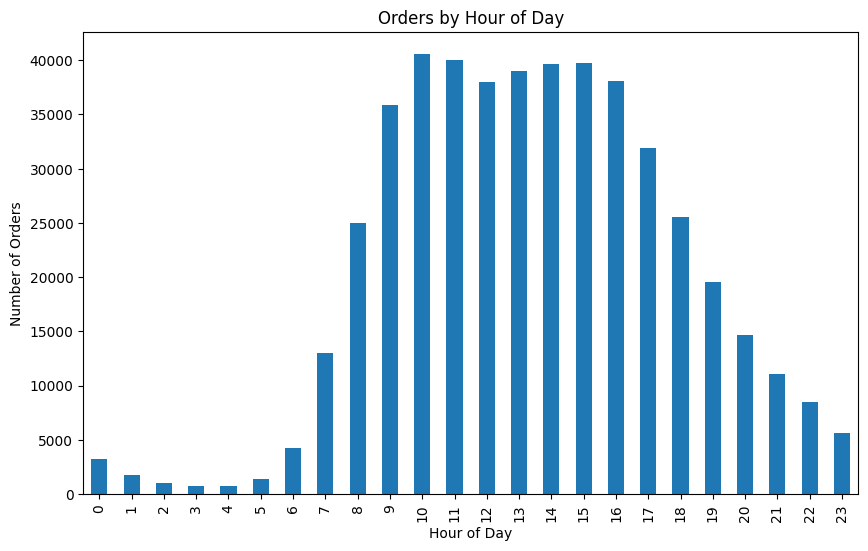

In [45]:
plt.figure(figsize=(10,6))
instacart_orders['order_hour_of_day'].value_counts().sort_index().plot(kind='bar')
plt.title('Orders by Hour of Day') 
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.show()

### [A3] What day of the week do people shop for groceries?

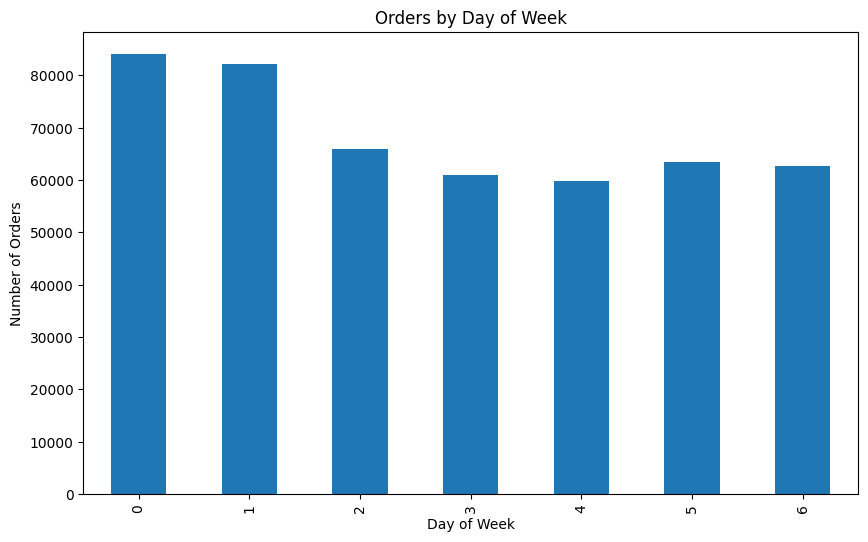

In [46]:
plt.figure(figsize=(10,6))
instacart_orders['order_dow'].value_counts().sort_index().plot(kind='bar')
plt.title('Orders by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Orders')
plt.show()

### [A4] How long do people wait until placing another order?

In [47]:
print(instacart_orders['days_since_prior_order'].sort_values().unique())

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. nan]


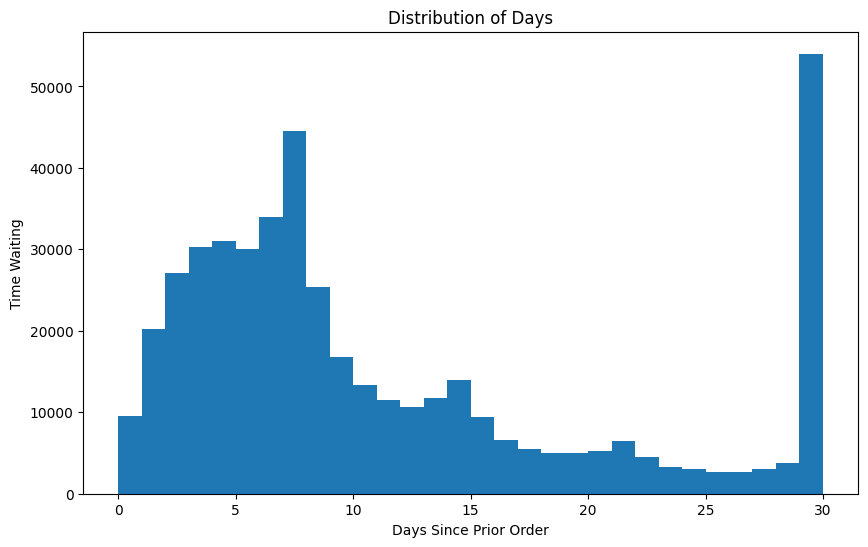

In [48]:
plt.figure(figsize=(10,6))
instacart_orders['days_since_prior_order'].sort_index().plot(kind='hist', bins=30)
plt.title('Distribution of Days')
plt.xlabel('Days Since Prior Order')
plt.ylabel('Time Waiting')
plt.show()

# [B] Medium (must complete all to pass)

### [B1] Is there a difference in `'order_hour_of_day'` distributions on Wednesdays and Saturdays? Plot the histograms for both days and describe the differences that you see.

In [49]:
# import matplotlib.pyplot as plt

In [50]:
wednesday_orders = instacart_orders[instacart_orders['order_dow'] == 2]
saturday_orders = instacart_orders[instacart_orders['order_dow'] == 5]
df_instacart = pd.DataFrame({'Wednesday': wednesday_orders['order_hour_of_day'], 
                        'Saturday': saturday_orders['order_hour_of_day']})

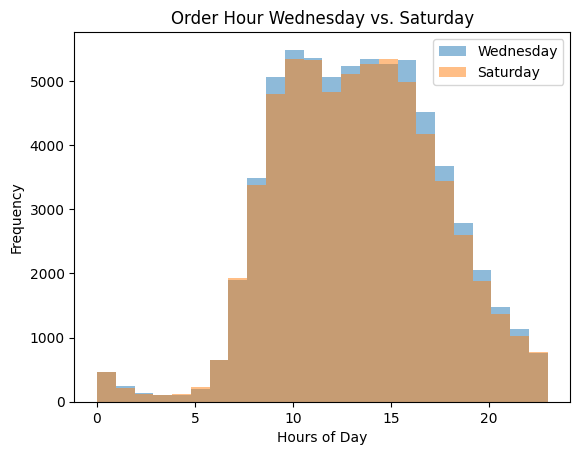

In [51]:
df_instacart.plot.hist(alpha=0.5, bins=24)
plt.title('Order Hour Wednesday vs. Saturday')
plt.xlabel('Hours of Day')
plt.ylabel('Frequency')
plt.legend(['Wednesday', 'Saturday'])
plt.show()

### [B2] What's the distribution for the number of orders per customer?

In [52]:
orders_per_cust= instacart_orders['user_id'].value_counts()

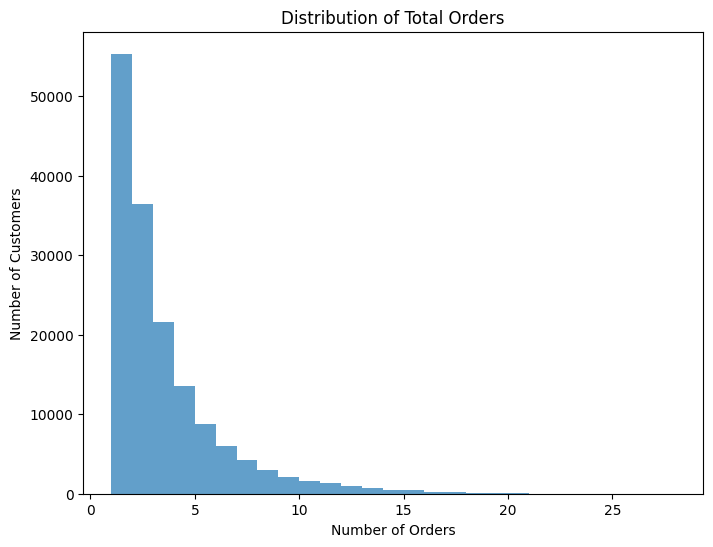

In [53]:
plt.figure(figsize=(8, 6))
plt.hist(orders_per_cust, bins=range(1, orders_per_cust.max() + 1), alpha=0.7)
plt.title('Distribution of Total Orders')
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')
plt.show()

Here is a range graph showing the distribution of orders.

### [B3] What are the top 20 popular products (display their id and name)?

In [54]:
merged = pd.merge(order_products, df_products, on='product_id')
product_counts = merged.groupby(['product_id', 'product_name']).size()
product_counts.sort_values(ascending=False).head(20)

product_id  product_name            
24852       banana                      66050
13176       bag of organic bananas      53297
21137       organic strawberries        37039
21903       organic baby spinach        33971
47209       organic hass avocado        29773
47766       organic avocado             24689
47626       large lemon                 21495
16797       strawberries                20018
26209       limes                       19690
27845       organic whole milk          19600
27966       organic raspberries         19197
22935       organic yellow onion        15898
24964       organic garlic              15292
45007       organic zucchini            14584
39275       organic blueberries         13879
49683       cucumber kirby              13675
28204       organic fuji apple          12544
5876        organic lemon               12232
8277        apple honeycrisp organic    11993
40706       organic grape tomatoes      11781
dtype: int64

Here shows the top 20 poplular products by merging the product id and product name.

# [C] Hard (must complete at least two to pass)

### [C1] How many items do people typically buy in one order? What does the distribution look like?

In [55]:
# Use .count() method to count the number of products per order
items_per_order = order_products.groupby('order_id').size()
items_per_order

order_id
4          13
9          15
11          5
19          3
20          8
           ..
3421034    17
3421053     9
3421071     5
3421077     4
3421079     1
Length: 450046, dtype: int64

In [56]:
# find the median number of products in an order .median()
median_items_per_order=items_per_order.median()
print(median_items_per_order)

8.0


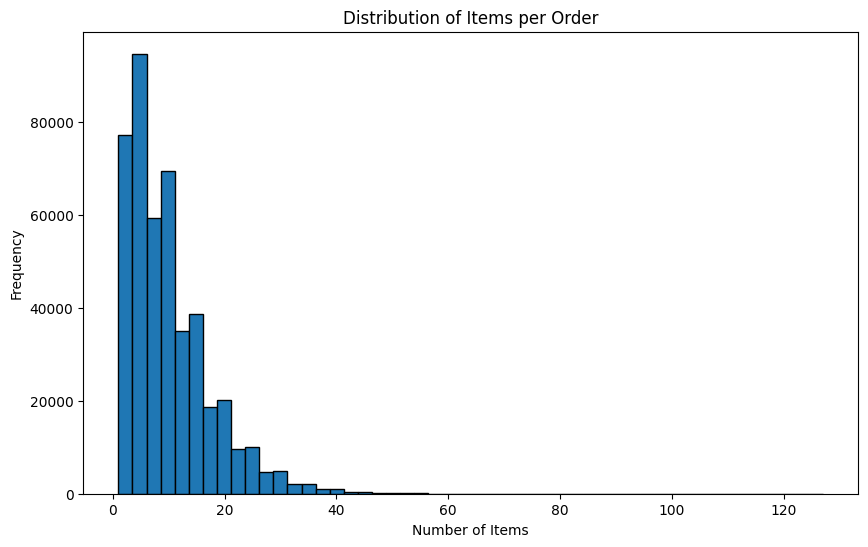

In [57]:
# plot
plt.figure(figsize=(10, 6))
plt.hist(items_per_order, bins=50, edgecolor='black')
plt.title('Distribution of Items per Order')
plt.xlabel('Number of Items')
plt.ylabel('Frequency')
plt.show()

In this section i filtered out by grouping the 'order_id'. I also found the mean which is 8.0 

### [C2] What are the top 20 items that are reordered most frequently (display their names and product IDs)?

In [58]:
# filter order_products so that reordered == 1.
reorder_counts = order_products[order_products['reordered'] == 1]['product_id'].value_counts().head(20)
print(reorder_counts)

24852    55763
13176    44450
21137    28639
21903    26233
47209    23629
47766    18743
27845    16251
47626    15044
27966    14748
16797    13945
26209    13327
22935    11145
24964    10411
45007    10076
49683     9538
28204     8989
8277      8836
39275     8799
5876      8412
49235     8389
Name: product_id, dtype: int64


In [59]:
# .head(20).index -> variable
top_reordered = reorder_counts.reset_index().merge(df_products, left_on='index', right_on='product_id')
print(top_reordered[[top_reordered.columns[1], 'product_name']])

    product_id_x              product_name
0          55763                    banana
1          44450    bag of organic bananas
2          28639      organic strawberries
3          26233      organic baby spinach
4          23629      organic hass avocado
5          18743           organic avocado
6          16251        organic whole milk
7          15044               large lemon
8          14748       organic raspberries
9          13945              strawberries
10         13327                     limes
11         11145      organic yellow onion
12         10411            organic garlic
13         10076          organic zucchini
14          9538            cucumber kirby
15          8989        organic fuji apple
16          8836  apple honeycrisp organic
17          8799       organic blueberries
18          8412             organic lemon
19          8389       organic half & half


Here shows the top 20 most items reordered by product name and product ID